# Bar Chart Race in Python with Matplotlib

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.animation as animation
from IPython.display import HTML

In [8]:
url = 'data/COVID-19 Cases.csv'
df = pd.read_csv(url)
df.head(5)

,Country_Region,Case_Type,Date,Cases,Table Names,Difference,Prep_Flow_Runtime,Latest_Date,Province_State,Lat,Long
0,US,Confirmed,3/23/2020,614,Daily Summary,109,3/25/2020 8:28:07 AM,3/24/2020,Tennessee,35.7478,-86.6923
1,US,Deaths,3/23/2020,2,Daily Summary,0,3/25/2020 8:28:07 AM,3/24/2020,Tennessee,35.7478,-86.6923
2,US,Confirmed,3/24/2020,772,Daily Summary,158,3/25/2020 8:28:07 AM,3/24/2020,Tennessee,35.7478,-86.6923
3,US,Deaths,3/24/2020,2,Daily Summary,0,3/25/2020 8:28:07 AM,3/24/2020,Tennessee,35.7478,-86.6923
4,US,Confirmed,3/9/2020,0,Time Series,0,3/25/2020 8:28:07 AM,3/24/2020,Tennessee,35.7478,-86.6923


In [3]:
df.dtypes

Country_Region        object
Case_Type             object
Date                  object
Cases                  int64
Table Names           object
Difference             int64
Prep_Flow_Runtime     object
Latest_Date           object
Province_State        object
Lat                  float64
Long                 float64
dtype: object

In [10]:
df1 = df.loc[df["Case_Type"] == "Confirmed", :]
df1.head()

,Country_Region,Case_Type,Date,Cases,Table Names,Difference,Prep_Flow_Runtime,Latest_Date,Province_State,Lat,Long
0,US,Confirmed,3/23/2020,614,Daily Summary,109,3/25/2020 8:28:07 AM,3/24/2020,Tennessee,35.7478,-86.6923
2,US,Confirmed,3/24/2020,772,Daily Summary,158,3/25/2020 8:28:07 AM,3/24/2020,Tennessee,35.7478,-86.6923
4,US,Confirmed,3/9/2020,0,Time Series,0,3/25/2020 8:28:07 AM,3/24/2020,Tennessee,35.7478,-86.6923
5,US,Confirmed,3/8/2020,0,Time Series,0,3/25/2020 8:28:07 AM,3/24/2020,Tennessee,35.7478,-86.6923
6,US,Confirmed,3/7/2020,0,Time Series,0,3/25/2020 8:28:07 AM,3/24/2020,Tennessee,35.7478,-86.6923


In [23]:
df2 = df1[["Country_Region", "Date", "Cases", "Province_State"]]
df2.head()

,Country_Region,Date,Cases,Province_State
0,US,3/23/2020,614,Tennessee
2,US,3/24/2020,772,Tennessee
4,US,3/9/2020,0,Tennessee
5,US,3/8/2020,0,Tennessee
6,US,3/7/2020,0,Tennessee


In [27]:
# Check NAN and dropna
print(df2[df2['Cases'].isnull()])
df1 = df1.dropna(subset=["Cases"])

In [27]:
# Check datatypes
df2.dtypes

Empty DataFrame
Columns: [Country_Region, Date, Cases, Province_State]
Index: []


Country_Region            object
Date              datetime64[ns]
Cases                      int64
Province_State            object
dtype: object

In [24]:
# Change the date column to datetime
df2["Date"] = pd.to_datetime(df2["Date"])
df2.dtypes

C:\Users\junya\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Country_Region            object
Date              datetime64[ns]
Cases                      int64
Province_State            object
dtype: object

In [17]:
# Choose the TOP 12 countries(with the most cases) for further barchart presentation
name_list = ["China", "Italy", "Spain", "Germany", "Iran", "France", "Korea, South", "US", "Switzerland", "United Kingdom", "Netherlands", "Austria"]

In [25]:
# Narrow down the dataset with given countries above
df2 = df2.loc[df2["Country_Region"].isin(name_list)]
df2.head()

,Country_Region,Date,Cases,Province_State
0,US,2020-03-23,614,Tennessee
2,US,2020-03-24,772,Tennessee
4,US,2020-03-09,0,Tennessee
5,US,2020-03-08,0,Tennessee
6,US,2020-03-07,0,Tennessee


In [28]:
# Since some countries have detailed numbers under "Province/State" column while other dont
# Aggregate the "Value" of each province/state 
df3 = df2.groupby(["Country_Region", "Date"]).sum()
df3.head(3)

Cases
Country_Region Date             
Austria        2020-01-23      0
               2020-01-24      0
               2020-01-25      0

In [29]:
# reset index
df4 = df3.reset_index(level = "Date").reset_index(level = "Country_Region")
df4.head()

,Country_Region,Date,Cases
0,Austria,2020-01-23,0
1,Austria,2020-01-24,0
2,Austria,2020-01-25,0
3,Austria,2020-01-26,0
4,Austria,2020-01-27,0


### Color

We'll user `colors` to add color to the bars.

In [30]:
colors = dict(zip(
    ["China", "Italy", "Spain", "Germany", "Iran", "France", "Korea, South", "US", "Switzerland", "United Kingdom", "Netherlands", "Austria"],
    ["#adb0ff", "#ffb3ff", "#90d595", "#e48381", "#aafbff", "#f7bb5f", "#eafb50", "#F0E68C", "#90EE90", "#00FFFF","#AFEEEE","#eafb50"]
))

## Bar Chart of Countires

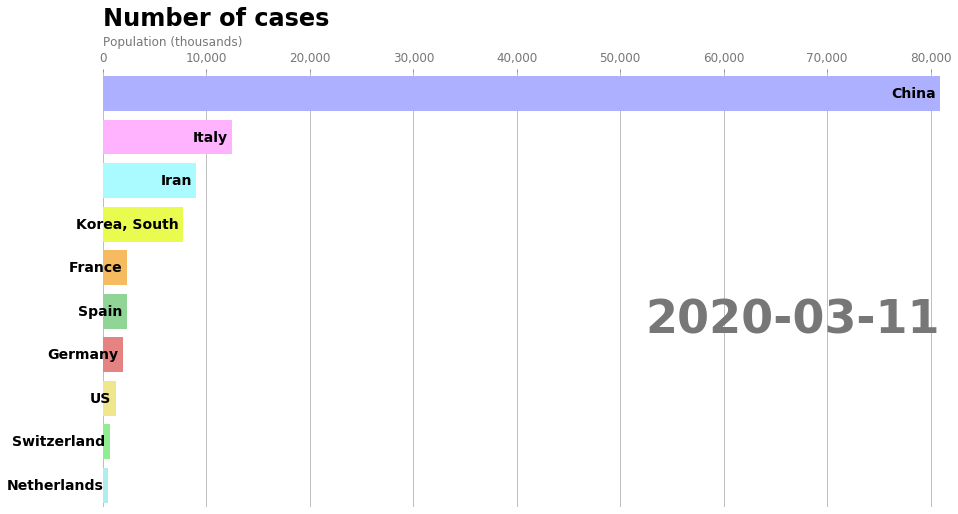

In [36]:
fig, ax = plt.subplots(figsize=(15, 8))

def draw_barchart(current_date):
    dff = df4[df4['Date'].eq(current_date)].sort_values(by='Cases', ascending=True).tail(10)
    ax.clear()
    ax.barh(dff['Country_Region'], dff['Cases'], color=[colors[x] for x in dff['Country_Region']])  
    dx = dff['Cases'].max() / 200
    for i, (value, name) in enumerate(zip(dff['Cases'], dff['Country_Region'])):
        ax.text(value-dx, i,     name,           size=14, weight=600, ha='right', va='center')
#         ax.text(value-dx, i-.25, group_lk[name], size=10, color='#444444', ha='right', va='baseline')
#         ax.text(value+dx, i,     f'{value:,.0f}',  size=14, ha='left',  va='center')
    ax.text(1, 0.4, current_date, transform=ax.transAxes, color='#777777', size=46, ha='right', weight=800)
    ax.text(0, 1.06, 'Population (thousands)', transform=ax.transAxes, size=12, color='#777777')
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    ax.xaxis.set_ticks_position('top')
    ax.tick_params(axis='x', colors='#777777', labelsize=12)
    ax.set_yticks([])
    ax.margins(0, 0.01)
    ax.grid(which='major', axis='x', linestyle='-')
    ax.set_axisbelow(True)
    ax.text(0, 1.15, 'Number of cases',
            transform=ax.transAxes, size=24, weight=600, ha='left', va='top')
    plt.box(False)
    
draw_barchart("2020-03-11")

In [32]:
df5 = df4.copy()
df5["Date"] = df5["Date"].astype(str)
date_list = df5["Date"].unique()
date_list

array(['2020-01-23', '2020-01-24', '2020-01-25', '2020-01-26',
       '2020-01-27', '2020-01-28', '2020-01-29', '2020-01-30',
       '2020-01-31', '2020-02-01', '2020-02-02', '2020-02-03',
       '2020-02-04', '2020-02-05', '2020-02-06', '2020-02-07',
       '2020-02-08', '2020-02-09', '2020-02-10', '2020-02-11',
       '2020-02-12', '2020-02-13', '2020-02-14', '2020-02-15',
       '2020-02-16', '2020-02-17', '2020-02-18', '2020-02-19',
       '2020-02-20', '2020-02-21', '2020-02-22', '2020-02-23',
       '2020-02-24', '2020-02-25', '2020-02-26', '2020-02-27',
       '2020-02-28', '2020-02-29', '2020-03-01', '2020-03-02',
       '2020-03-03', '2020-03-04', '2020-03-05', '2020-03-06',
       '2020-03-07', '2020-03-08', '2020-03-09', '2020-03-10',
       '2020-03-11', '2020-03-12', '2020-03-13', '2020-03-14',
       '2020-03-15', '2020-03-16', '2020-03-17', '2020-03-18',
       '2020-03-19', '2020-03-20', '2020-03-21', '2020-03-22',
       '2020-03-23', '2020-03-24'], dtype=object)

## Animate

To animate, we will use [`FuncAnimation`][FuncAnimation] from `matplotlib.animation`.

[`FuncAnimation`][FuncAnimation] makes an animation by repeatedly calling a function (that draws on canvas). 
In our case, it'll be `draw_barchart`.

`frames` arguments accepts on what values you want to run `draw_barchart` -- we'll
run from `year` 1900 to 2018.

Run below cell.

[FuncAnimation]: https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.animation.FuncAnimation.html

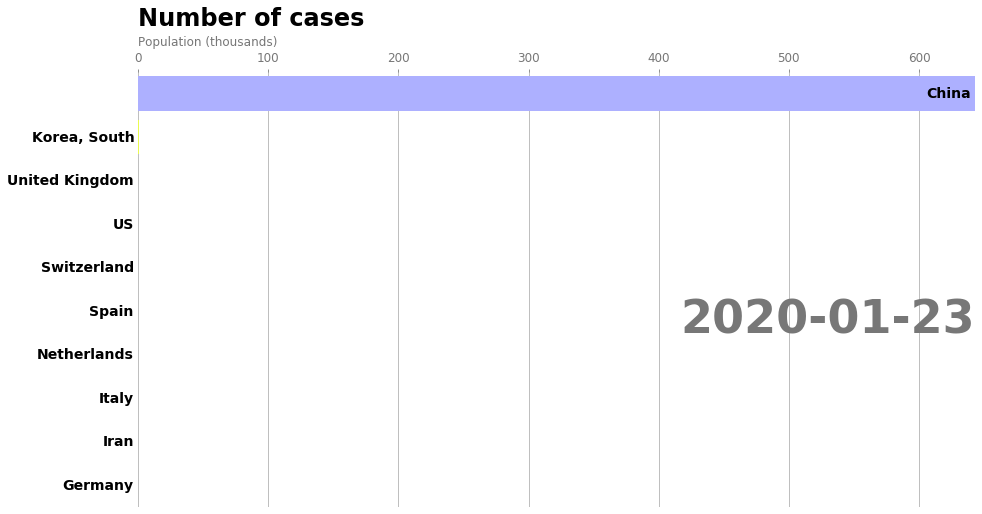

In [34]:
fig, ax = plt.subplots(figsize=(15, 8))
animator = animation.FuncAnimation(fig, draw_barchart, frames=date_list)
HTML(animator.to_jshtml())
# or use animator.to_html5_video() or animator.save() 

## Bar Chart for US

In [39]:
df_US = df2.loc[df2["Country_Region"] == "US"]
df_US.head(5)

,Country_Region,Date,Cases,Province_State
0,US,2020-03-23,614,Tennessee
2,US,2020-03-24,772,Tennessee
4,US,2020-03-09,0,Tennessee
5,US,2020-03-08,0,Tennessee
6,US,2020-03-07,0,Tennessee


In [42]:
df_US_1 = df_US.groupby(["Province_State", "Date"]).sum()
df_US_1.head()

Cases
Province_State Date             
Alabama        2020-01-23      0
               2020-01-24      0
               2020-01-25      0
               2020-01-26      0
               2020-01-27      0

In [44]:
df_US_2 = df_US_1.reset_index(level = "Date").reset_index(level = "Province_State")
df_US_2.head()

,Province_State,Date,Cases
0,Alabama,2020-01-23,0
1,Alabama,2020-01-24,0
2,Alabama,2020-01-25,0
3,Alabama,2020-01-26,0
4,Alabama,2020-01-27,0


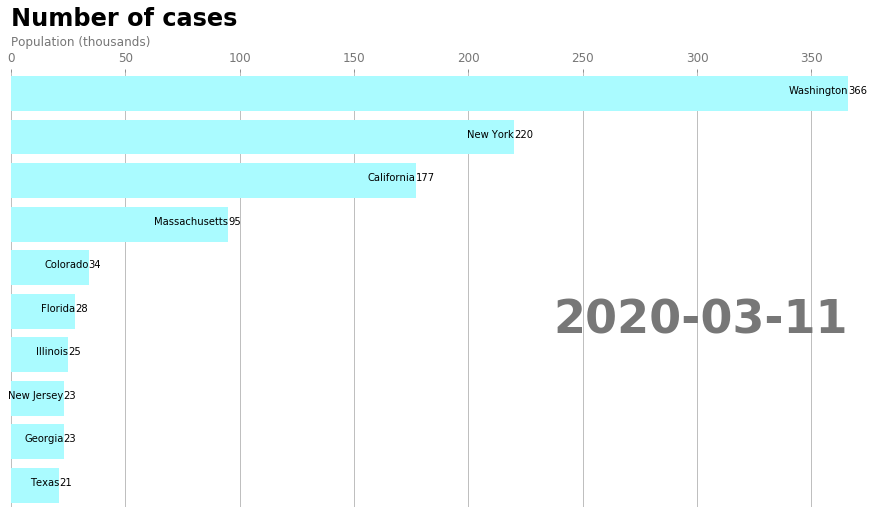

In [67]:
fig, ax = plt.subplots(figsize=(15, 8))

def draw_barchart(current_date):
    dff = df_US_2[df_US_2['Date'].eq(current_date)].sort_values(by='Cases', ascending=True).tail(10)
    ax.clear()
    ax.barh(dff['Province_State'], dff['Cases'], color="#aafbff")
#             , color=[colors[x] for x in dff['Country_Region']]  
    dx = dff['Cases'].max() / 200
    for i, (value, state) in enumerate(zip(dff['Cases'], dff['Province_State'])):
        ax.text(value, i, state, ha='right')
#         ax.text(value, i-.25, group_lk[name],  ha='right')
        ax.text(value, i, value, ha='left')
#     for i, (value, name) in enumerate(zip(dff['Cases'], dff['Country_Region'])):
#         ax.text(value-dx, i,     name,           size=14, weight=600, ha='right', va='center')
#         ax.text(value-dx, i-.25, group_lk[name], size=10, color='#444444', ha='right', va='baseline')
#         ax.text(value+dx, i,     f'{value:,.0f}',  size=14, ha='left',  va='center')
    ax.text(1, 0.4, current_date, transform=ax.transAxes, color='#777777', size=46, ha='right', weight=800)
    ax.text(0, 1.06, 'Population (thousands)', transform=ax.transAxes, size=12, color='#777777')
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    ax.xaxis.set_ticks_position('top')
    ax.tick_params(axis='x', colors='#777777', labelsize=12)
    ax.set_yticks([])
    ax.margins(0, 0.01)
    ax.grid(which='major', axis='x', linestyle='-')
    ax.set_axisbelow(True)
    ax.text(0, 1.15, 'Number of cases',
            transform=ax.transAxes, size=24, weight=600, ha='left', va='top')
    plt.box(False)
    
draw_barchart("2020-03-11")

In [69]:
df_US_3 = df_US_2.copy()
df_US_3["Date"] = df_US_3["Date"].astype(str)
date_list_1 = df_US_3["Date"].unique()
date_list_2 = date_list_1[-15:]
date_list_2

array(['2020-03-10', '2020-03-11', '2020-03-12', '2020-03-13',
       '2020-03-14', '2020-03-15', '2020-03-16', '2020-03-17',
       '2020-03-18', '2020-03-19', '2020-03-20', '2020-03-21',
       '2020-03-22', '2020-03-23', '2020-03-24'], dtype=object)

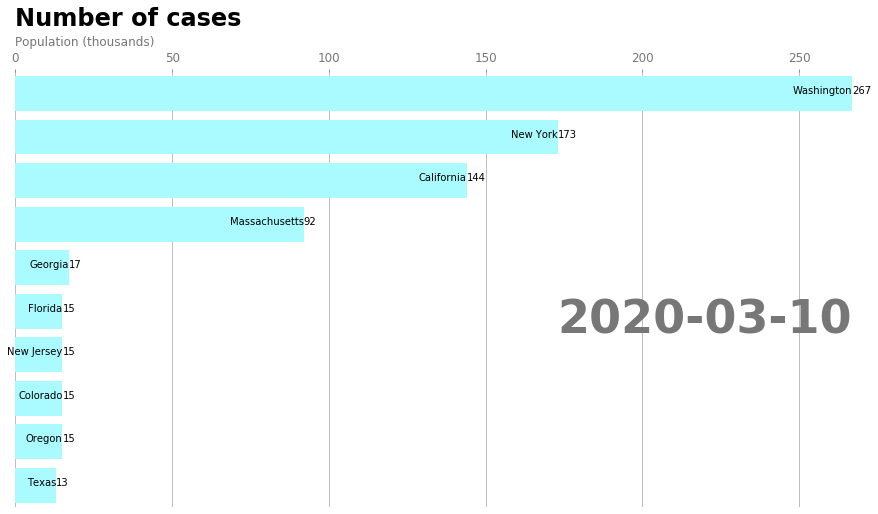

In [70]:
fig, ax = plt.subplots(figsize=(15, 8))
animator = animation.FuncAnimation(fig, draw_barchart, frames=date_list_2)
HTML(animator.to_jshtml())